In [150]:
#load libraries
import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np
import os
import datetime
import time
import pandas as pd

In [194]:
#set path and retrieve all grib files in the directory
path = '/Users/orbenyang/data/ERA5'
grib_files = [f for f in os.listdir(path=path) if f.endswith('.grib')]
grib_files = sorted(grib_files)   #sorted grib_files
print(grib_files)

['era5_china_2011_2mt.grib', 'era5_china_2012_2mt.grib', 'era5_china_2013_2mt.grib', 'era5_china_2014_2mt.grib', 'era5_china_2015_2mt.grib', 'era5_china_2016_2mt.grib', 'era5_china_2017_2mt.grib', 'era5_china_2018_2mt.grib', 'test_subarea.grib']


In [195]:
# read each grib files
grib_file = path + "/" + grib_files[2]    #set full path to one grib file
print(grib_file)
grbs = pygrib.open(grib_file)  #open a grib file and get all gribs


/Users/orbenyang/data/ERA5/era5_china_2013_2mt.grib


In [232]:
print(grbs.messages)   #4416 messages, each message corresponding to the data in the time sequence
# print each grb message
#for grb in grbs.select():   #uncomment it to see how many data in grbs
    #print(grb)

4416


In [197]:
# select the first grb
grb = grbs.select()[0]
data = grb.values

In [230]:
#grb.keys()   #uncomment it to have a look at the keys in this datafile

Text(0.5, 1.0, 'CAMS AOD forecast')

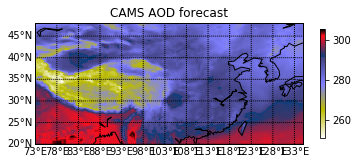

In [198]:
#get basic information about the data
# date, time, dimension, lons, lats, 
#print(grb['dataDate'])
#print(grb['julianDay'])
#print(grb['dataTime'])
#print(grb['year'],grb['month'],grb['day'],grb['hour'])
#print(grb['latitudeOfFirstGridPoint'])
#print(grb['latitudeOfLastGridPoint'])
#print(grb['jDirectionIncrement'])
#print(grb['Nj'], grb['Ni'])
lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), float(grb['longitudeOfLastGridPointInDegrees']),int(grb['Ni']))
lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']),float(grb['latitudeOfLastGridPointInDegrees']),int(grb['Nj']))
#print(lons)
#print(lats)
grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
#print(grid_lon)
m = Basemap(projection='cyl', llcrnrlon=float(grb['longitudeOfFirstGridPointInDegrees']), urcrnrlon=float(grb['longitudeOfLastGridPointInDegrees']),llcrnrlat=lats.min(), urcrnrlat=lats.max(), resolution='c')
x, y = m(grid_lon, grid_lat)   #actually, x == grid_lon, y==grid_lat

cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.gist_stern_r)
 
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(lats.min(),lats.max(),5.),labels=[1,0,0,0])
m.drawmeridians(np.arange(lons.min(),lons.max(),5.),labels=[0,0,0,1])

plt.colorbar(cs,orientation='vertical', shrink=0.5)
plt.title('CAMS AOD forecast') # Set the name of the variable to plot
#plt.savefig(grib+'.png') # Set the output file name


In [199]:
#get one temperature of one grid from one grib message
data_grid = grb.data(lat1=32, lat2=32, lon1=118.5, lon2=118.5)
print(data_grid[0][0][0]-273.15)

17.650872802734398


In [200]:
grb.analDate

datetime.datetime(2013, 5, 1, 0, 0)

In [201]:
#get a series of temperature of one grid
tempt = []
times = []
for grb in grbs.select():
    #for each grb, retrieve temperature
    times.append(grb.analDate)
    tempt.append(grb.data(lat1=32, lat2=32, lon1=118.5, lon2=118.5)[0][0][0])

#print(tempt)


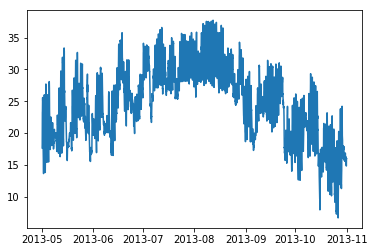

In [219]:
temperatures = np.array(tempt) - 273.15
plt.plot(times, temperatures)

In [203]:
len(temperature[temperature>=35])

129

In [229]:
#times

In [213]:
a = times[0]
b = times[::24]  #start hour of everyday

In [228]:
dates = [x.date() for x in times]
#print(dates)
hours = [x.hour for x in times]
#print(hours)

In [206]:
date_selected = [x for x in dates if x==datetime.date(2013,10,1)]
date_selected

[datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1),
 datetime.date(2013, 10, 1)]

In [225]:
#temperature of one grid in a year, stored as a pd.DataFrame
t_pd = pd.DataFrame({'date':dates, 'hour':hours, 'temperature':temperatures})

In [227]:
t_pd.head(30)

,date,hour,temperature
0,2013-05-01,0,17.650873
1,2013-05-01,1,18.238123
2,2013-05-01,2,22.926675
3,2013-05-01,3,23.205896
4,2013-05-01,4,23.425638
5,2013-05-01,5,25.145166
6,2013-05-01,6,25.381250
7,2013-05-01,7,25.565820
8,2013-05-01,8,25.020166
9,2013-05-01,9,25.150537


In [ ]:
# have a look at the temperature in a day (2013-08-08)
t_pdy = t_pd[t_pd['date'] == datetime.date(2013, 8, 8)][:]
print(t_pdy['temperature'].max())   #maximum temperature
print(t_pdy['temperature'].min())   #minimum temperature
print(t_pdy['temperature'].mean())  #mean temperature

## Objectives:
1) select middle-east part of China including the YZR area and NE area;

2) check the distribution of phenology data to determine the onset of each periods. 
